as we can see in the Screenshot from  (https://www.talabat.com/egypt/restaurants), we want to extract data from the website.

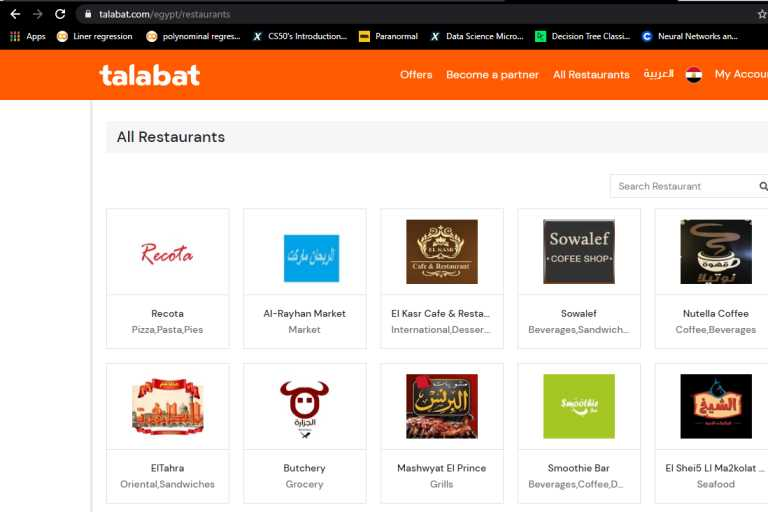

In [ ]:
pip install beautifulsoup4

In [ ]:
#we import the libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd
import sys


In [ ]:
result=requests.get('https://www.talabat.com/egypt/restaurants') #we make a requests to get the link info 
    
website=BeautifulSoup(result.content,'lxml') #we turn the url contant to readable HTML 

#### we want to extract the restaurant name we :

1-right click on the name 

2- choice inspect

3-we only interested on two parts of the HTML , first is the first letter or word after the '<' sign , second the attribute and here we have the class arrtibute

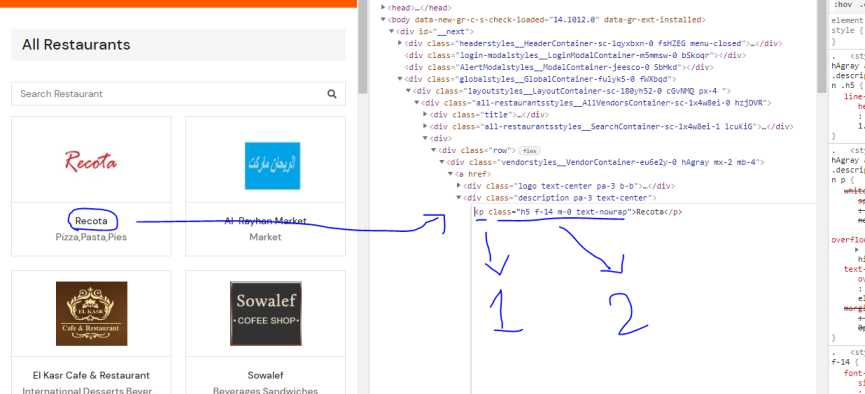

In [ ]:
name=website.find_all('p',{'class':'h5 f-14 m-0 text-nowrap'}) 

#the name variable will return every restaurant HTML that has the name in the page but in the list type


name[1].text #we can check if it works , by specify which element in the list we want to turn into a text



In [ ]:
#to get turn all the HTML into text we use FOR loop

res_name=[]   #create an empty list to store the output inside it 
for i in range(len(name)):
    res_name.append(name[i].text)
    
    
res_name #as you can see we get all restaurant names

### we can do the same as we did with the name , in order to get the restaurant type

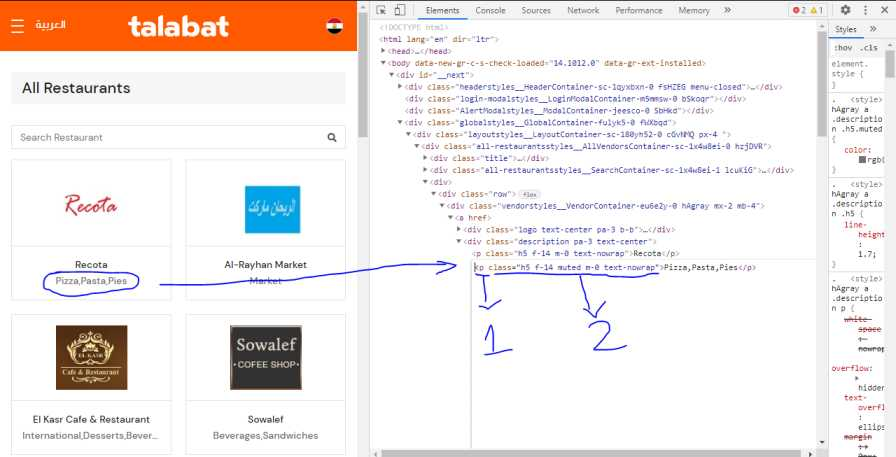

In [ ]:
name=website.find_all('p',{'class':'h5 f-14 m-0 text-nowrap'}) 
typee=website.find_all('p',{'class':'h5 f-14 muted m-0 text-nowrap'}) 

res_name=[] #create an empty list to store the output inside it 
res_type=[]
for i in range(len(name)):
    res_name.append(name[i].text)
    res_type.append(typee[i].text)



In [ ]:
res_type

### how to get info from the inner page?

in order to get the restaurant rate , we do as following

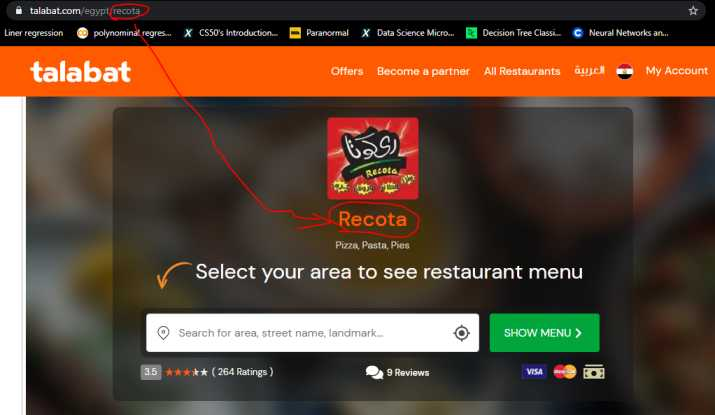

#### this only for the this page it will take forever to do this for the whole pages

as we can see The variable part is the last part and it's the restaurant name 


##### note : there are no spaces or speical letters in the link so we have to make sure we remove it all 

In [ ]:
#function to return the resturnt name in a shape to be readable as a link

def remove(name):
    string=("[@_!#.$%^&*()<>?/'\|}{~:]") 
    
    for i in string:
        name=name.replace(i, "") #remove the spical chracters
        
    return name.replace(" ","-") #replace the space with a -

In [ ]:
#we create the links from the res_name list:
links=[]

for a in res_name:
    links.append('https://www.talabat.com/egypt/'+remove(a))
    links=list(dict.fromkeys(links))

In [ ]:
links #we have now the links

#### after creating the funcation we do the same as we did with name and type 

In [ ]:
rate=[]

for linkk in links: 
    
    result=requests.get(linkk)
    src=result.content
    soup=BeautifulSoup(result.content,'lxml')
    rates=soup.find('div',{'class':'rating-number text-center mr-1'})
    
    try:                    #we use the try and excpt in order if we get an invaild link,we don't have to stop all the for loop.
        rate.append(rates.text)
        
    except:
        rate.append(0) #we append a 0 with invailed links , in order to keep the order 
        print("Oops!", sys.exc_info()[0], "occurred.")
        print("Next entry.")
        print()

In [ ]:
rate #now we have the rate, notice that the 0 as an int means invaild link,and '0.0' as str is a rate

#### but we did this for only one page , how to make it to all pages ?

we use a while loop

In [ ]:
#creating the lists
res_name=[]
res_type=[]
links=[]
rate=[]
number=0

In [ ]:
# create the while loop for 13 pages
while number < 13 : #we will do the same as we did previously
    
    result=requests.get(f'https://www.talabat.com/egypt/restaurants?page={number}') #we here change the page number to the number variable
    website=BeautifulSoup(result.content,'lxml')
    
    name=website.find_all('p',{'class':'h5 f-14 m-0 text-nowrap'}) 
    typ=website.find_all('p',{'class':'h5 f-14 muted m-0 text-nowrap'})
    
    
    for i in range(len(name)):
        res_name.append(name[i].text)
        res_name=list(dict.fromkeys(res_name))
        
        res_type.append(typ[i].text)

        
    #creating the links    
    for a in res_name:
        links.append('https://www.talabat.com/egypt/'+remove(a))
        links=list(dict.fromkeys(links))
        
        
        
    number += 1
    print('pag is done',number) #to keep track with the page number

In [ ]:
rate=[]


In [ ]:
#this may take a while 
for linkk in links:
    
    result=requests.get(linkk)
    src=result.content
    soup=BeautifulSoup(result.content,'lxml')
    rates=soup.find('div',{'class':'rating-number text-center mr-1'})
    
    try:
        rate.append(rates.text)
        
    except:
        rate.append(0)
        print("Oops!", sys.exc_info()[0], "occurred.")
        print("Next entry.")
        print()

In [ ]:
#creating a dataframe that has all the lists

a ={'res_name':res_name,'res_type':res_type,'links':links,'rate':rate}
df = pd.DataFrame.from_dict(a, orient='index').transpose() #we did that as if we have an empty cell
df=df.dropna()


In [ ]:
df #here you have the data 

In [ ]:
stop

In [ ]:
df.to_csv('talabt.csv', index=False) #saving the df into your local